# Initial data exploration

Let's see what we have in the database:

In [118]:
# assuming the data was imported into the database named stores
from pymongo import MongoClient
import pandas as pd
from IPython.display import HTML, display

db = MongoClient()['stores']

TOTAL_NUMBER_OF_PRODUCTS = db.data.count()

display(HTML(
    "products/records in the database: <b>{:,}</b>".format(
        TOTAL_NUMBER_OF_PRODUCTS)))

## Unique values for fields

Calculate the number of unique values for each field.

Field       Uniq. Values    Avg. Products per Field
--------  --------------  -------------------------
brand                338                       4619
category             527                       2962
size                1117                       1398
code               20078                         78
color              20333                         77


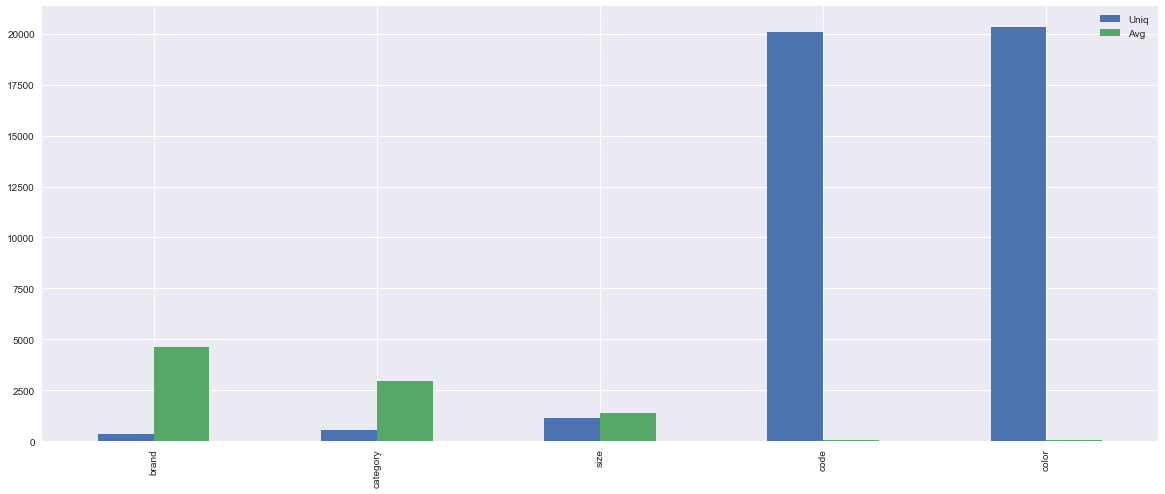

In [119]:
# The number of uniq. values for given key in database
%matplotlib inline
from tabulate import tabulate
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20,8)

fields = ['brand', 'category', 'size', 'code', 'color']
values_by_key = []
for field in fields:
    res = db.data.distinct(field)
    avg_items = round(TOTAL_NUMBER_OF_PRODUCTS / len(res))
    values_by_key.append([field, int(len(res)), avg_items])

print(tabulate(values_by_key, headers=['Field', 'Uniq. Values', 'Avg. Products per Field'], tablefmt="simple"))

df_values_by_key = pd.DataFrame(values_by_key, index=fields, columns=['Field', 'Uniq', 'Avg'])
df_values_by_key.plot.bar()

## Products per Distributor

Distributor      Number of Products
-------------  --------------------
marsha                       226515
ignacia                      209310
jeneva                       145671
patti                        130398
shemeka                      126732
evie                         109834
larry                        105068
kina                          88768
allegra                       76808
major                         65977
titus                         60460
rossana                       49008
denisha                       45662
carey                         36457
rubi                          34641
wendell                       25784
joanie                        10345
yolande                        6388
zack                           3715
ciara                          3618


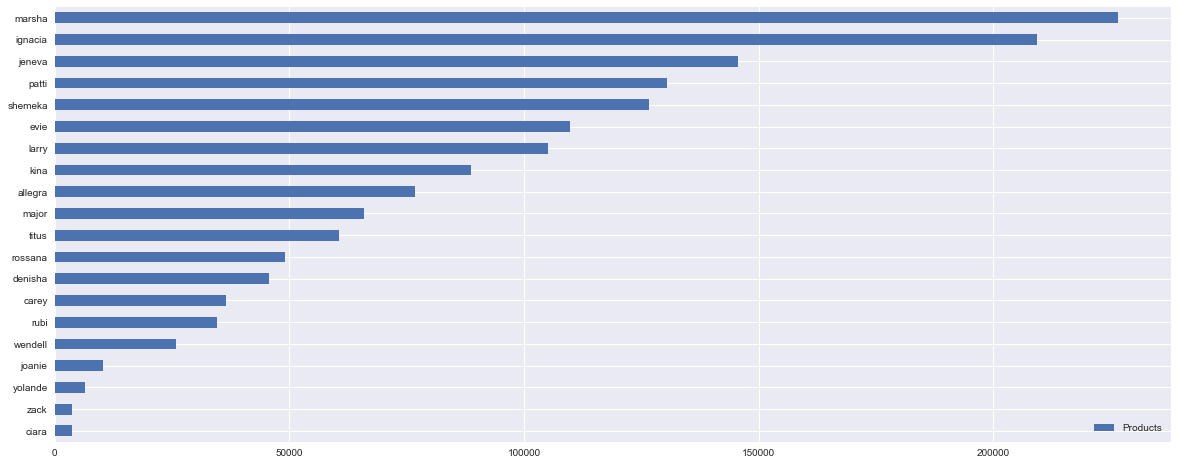

In [120]:
DISTRIBUTORS = list(db.data.distinct("source"))
results = db.data.aggregate(
    [
        {
            "$group": {
                "_id": "$source",
                "count": {"$sum": 1},
            }
        },
        {
            "$sort": {
                "count": -1,
            }
        }
    ]
)
PRODUCTS_PER_DISTRIBUTOR = [
    (str(x['_id']), x['count']) 
    for x in list(results)
]
print(tabulate(PRODUCTS_PER_DISTRIBUTOR, 
               headers=['Distributor', 'Number of Products'], 
               tablefmt="simple"))

df_values_by_key = pd.DataFrame(PRODUCTS_PER_DISTRIBUTOR, 
                                index=[x[0] for x in PRODUCTS_PER_DISTRIBUTOR], 
                                columns=['Distributor', 'Products'])
df_values_by_key.iloc[::-1].plot.barh()

## Top Brands

Brand                Number of Products
-----------------  --------------------
augusta                          137980
                                 126929
gildan                            94038
badger                            72739
None                              64153
port authority                    53788
hanes                             50641
comfort colors                    42246
jerzees                           34338
next level                        33791
anvil                             32603
bella+canvas                      32241
ultraclub                         29842
augusta drop ship                 28439
port & company                    28186
champion                          24737
sport-tek                         24373
bella + canvas                    24037
badger sport                      23863
a4                                23769


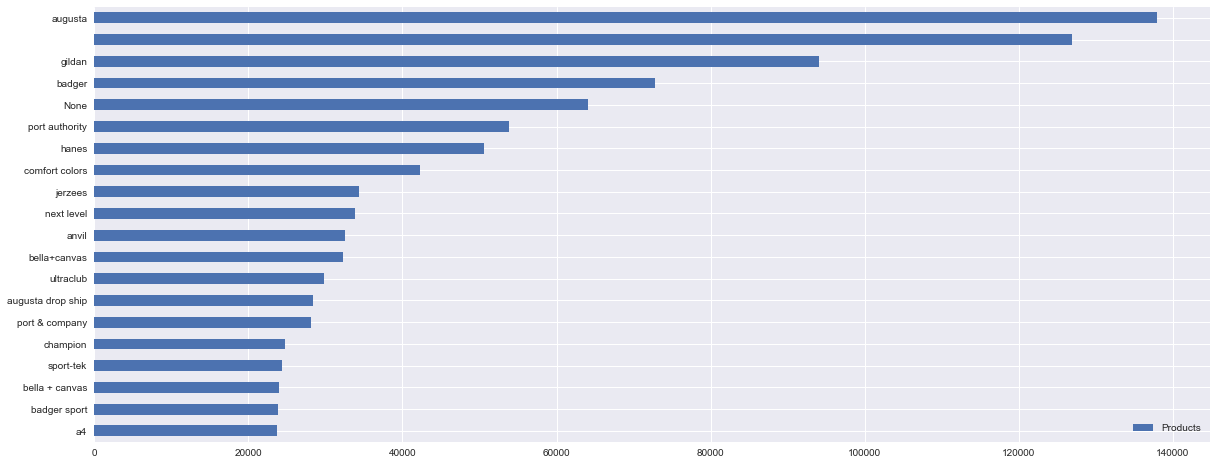

In [121]:
results = db.data.aggregate(
    [
        {
            "$group": {
                "_id": "$brand",
                "count": {"$sum": 1},
            }
        },
        {
            "$sort": {
                "count": -1,
            }
        },
        {
            "$limit": 20
        }
    ]
)
TOP_BRANDS = [(str(x['_id']), x['count']) for x in list(results)]
print(tabulate(TOP_BRANDS, 
               headers=['Brand', 'Number of Products'], tablefmt="simple"))

df_values_by_key = pd.DataFrame(TOP_BRANDS, 
                                index=[x[0] for x in TOP_BRANDS], 
                                columns=['Brand', 'Products'])
df_values_by_key.iloc[::-1].plot.barh()


Brand field is empty for 126929 + 64153 products.

## Top Sizes


Size        Number of Products
--------  --------------------
M                       202965
L                       202641
S                       202589
XL                      186166
2XL                     152014
3XL                     106966
XS                       71104
4XL                      50869
MEDIUM                   31645
LARGE                    31599
SMALL                    31506
EXTRA                    31098
2X                       20091
3X                       20085
5XL                      17541
ONE                      13786
XXL                      11288
OS                        7615
ONE SIZE                  7269
XX                        7184


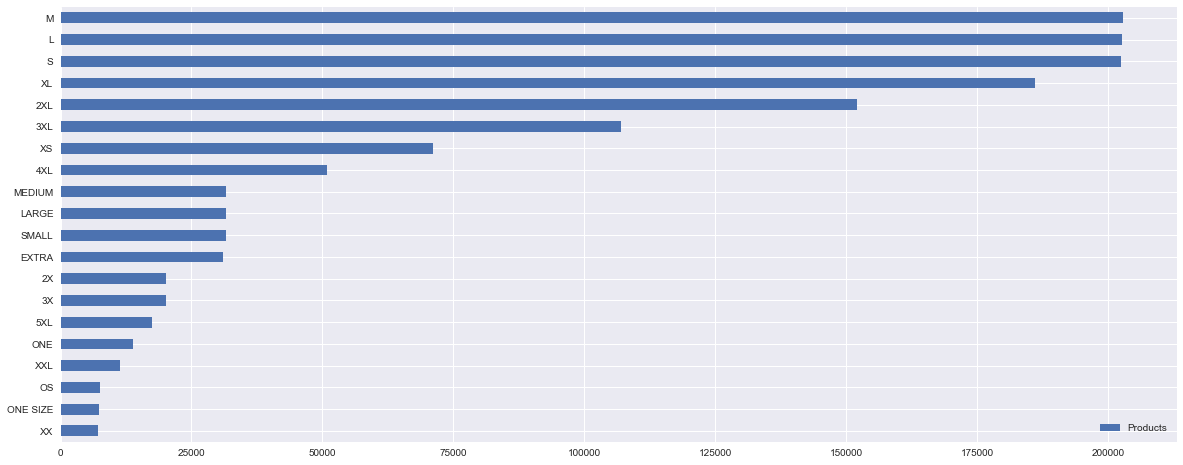

In [122]:
results = db.data.aggregate(
    [
        {
            "$group": {
                "_id": "$size",
                "count": {"$sum": 1},
            }
        },
        {
            "$sort": {
                "count": -1,
            }
        },
        {
            "$limit": 20
        }
    ]
)
TOP_SIZES = [(str(x['_id']), x['count']) for x in list(results)]
print(tabulate(TOP_SIZES, headers=['Size', 'Number of Products'], tablefmt="simple"))

df_values_by_key = pd.DataFrame(TOP_SIZES, 
                                index=[x[0] for x in TOP_SIZES], 
                                columns=['Size', 'Products'])
df_values_by_key.iloc[::-1].plot.barh()

# Top Categories

Category                Number of Products
--------------------  --------------------
t-shirts                            193663
None                                129013
activewear                           50966
tee shirts                           43741
augusta                              35186
mens tees                            33545
performance                          29677
teamwear                             29162
augusta drop ship                    28439
fleece                               27280
polos                                25884
outerwear                            25068
polos/knits                          24863
t shirts                             24755
[mens]                               23350
gildan                               19964
big & tall+                          19377
badger                               18021
womens tees                          16753
dickies occupational                 15706


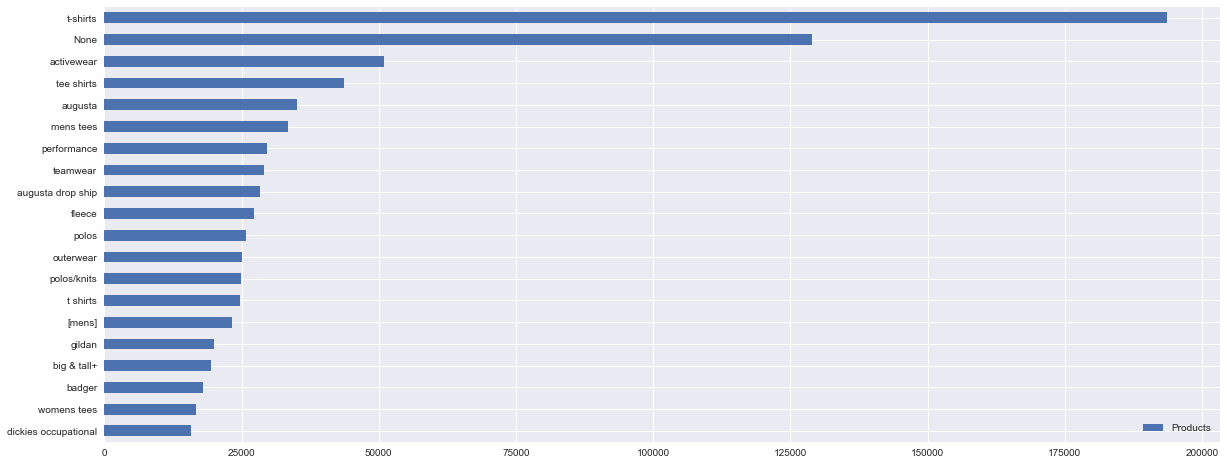

In [123]:
results = db.data.aggregate(
    [
        {
            "$group": {
                "_id": "$category",
                "count": {"$sum": 1},
            }
        },
        {
            "$sort": {
                "count": -1,
            }
        },
        {
            "$limit": 20
        }
    ]
)
TOP_CATEGORIES = [(str(x['_id']), x['count']) for x in list(results)]
print(tabulate(TOP_CATEGORIES, headers=['Category', 'Number of Products'], tablefmt="simple"))

df_values_by_key = pd.DataFrame(TOP_CATEGORIES, 
                                index=[x[0] for x in TOP_CATEGORIES], 
                                columns=['Category', 'Products'])
df_values_by_key.iloc[::-1].plot.barh()

## Top Colors

Color           Number of Products
------------  --------------------
BLACK                        95738
WHITE                        68948
NAVY                         57694
RED                          42204
ROYAL                        36039
MAROON                       22059
PURPLE                       19195
CHARCOAL                     16196
GOLD                         13800
LIGHT BLUE                   12964
ORANGE                       12878
FOREST GREEN                 12213
GRAPHITE                      9854
SILVER                        9165
ASH                           9017
PINK                          7624
FOREST                        7570
LIME                          7537
KELLY                         7487
BLACK/WHITE                   7391


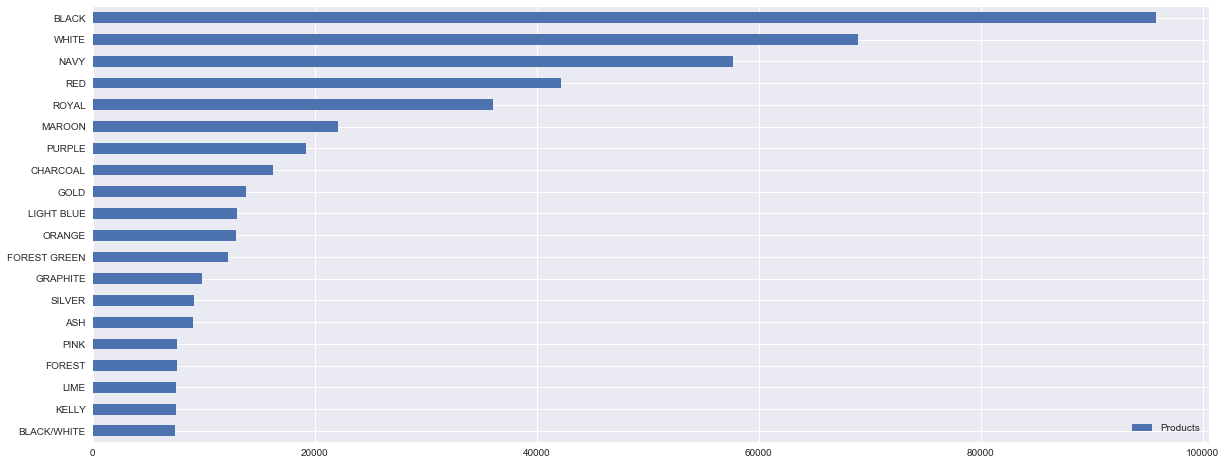

In [124]:
results = db.data.aggregate(
    [
        {
            "$group": {
                "_id": "$color",
                "count": {"$sum": 1},
            }
        },
        {
            "$sort": {
                "count": -1,
            }
        },
        {
            "$limit": 20
        }
    ]
)
TOP_COLORS = [(str(x['_id']), x['count']) for x in list(results)]
print(tabulate(TOP_COLORS, headers=['Color', 'Number of Products'], tablefmt="simple"))

df_values_by_key = pd.DataFrame(TOP_COLORS, 
                                index=[x[0] for x in TOP_COLORS], 
                                columns=['Color', 'Products'])
df_values_by_key.iloc[::-1].plot.barh()

## Top Codes

Code      Number of Products
------  --------------------
874                     3219
5180                    3098
2000                    3060
5250                    2910
5000                    2801
29M                     2764
980                     2521
5170                    2392
4400                    2329
3001                    2328
1717                    2304
3005                    2280
3001C                   2224
4980                    2200
3480                    2063
6004                    2055
M1009                   2002
29B                     1943
3600                    1906
9030                    1857


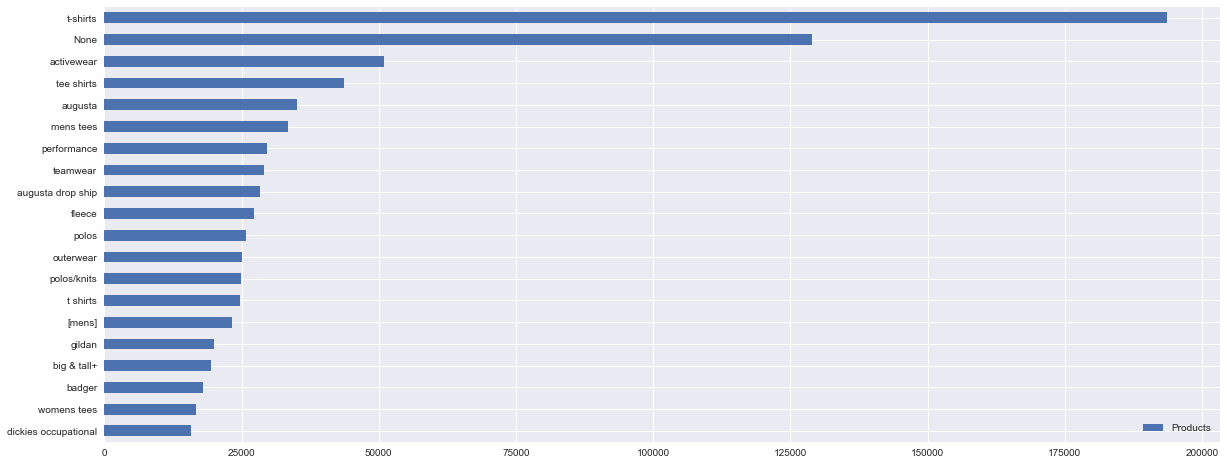

In [125]:
results = db.data.aggregate(
    [
        {
            "$group": {
                "_id": "$code",
                "count": {"$sum": 1},
            }
        },
        {
            "$sort": {
                "count": -1,
            }
        },
        {
            "$limit": 20
        }
    ]
)
TOP_CODES = [(str(x['_id']), x['count']) for x in list(results)]
print(tabulate(TOP_CODES, headers=['Code', 'Number of Products'], tablefmt="simple"))

df_values_by_key = pd.DataFrame(TOP_CATEGORIES, 
                                index=[x[0] for x in TOP_CATEGORIES], 
                                columns=['Code', 'Products'])
df_values_by_key.iloc[::-1].plot.barh()

## Measurements per Distributor

Collect the number of uniq brands, color, sizes, categories and codes for each distributor

Distributor      Brands    Colors    Sizes    Categories    Codes
-------------  --------  --------  -------  ------------  -------
marsha              123      6715      222           143     5210
ignacia             114      6076      106           114     5116
wendell              31       959       94            86      760
jeneva               66      3011      491            66     2675
rubi                 10      1697      186            54     1666
denisha               1      2746       74            34      885
kina                 40      2295      189            29     1927
patti                58      2687       81            26     3054
evie                 73      2515       64            20     2539
major                22      1319       63            18     1443
carey                15       691       35            18      931
ciara                 1       142       30            17      142
yolande              12       262       28            14      109
shemeka   

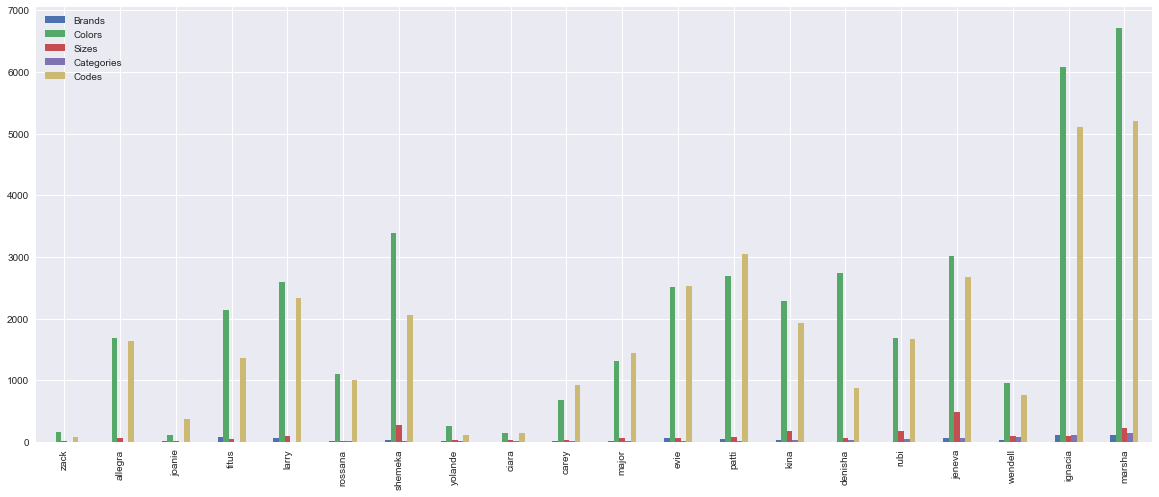

In [126]:
MEASUREMENT_PER_DISTRIBUTOR = db.data.aggregate(
    [
        {
            "$group": {
                "_id": "$source",
                "brands": {"$addToSet": "$brand"},
                "colors": {"$addToSet": "$color"},
                "sizes": {"$addToSet": "$size"},
                "categories": {"$addToSet": "$category"},
                "codes": {"$addToSet": "$code"}
            }
        },
        {
            "$project": {
                "_id": 1,
                "brands": {"$size": "$brands"},
                "colors": {"$size": "$colors"},
                "sizes": {"$size": "$sizes"},
                "categories": {"$size": "$categories"},
                "codes": {"$size": "$codes"},
            }
        },
        {
            "$sort": {
                "categories": -1,
                "brands": -1,
                "colors": -1,
                "sizes": -1,
                "codes": -1,
            }
        },
    ]
)

TABLE_MEASUREMENTS_PER_DISTRIBUTOR = [
    (str(x['_id']), x['brands'], x['colors'], 
     x['sizes'], x['categories'], x['codes']) 
    for x in list(MEASUREMENT_PER_DISTRIBUTOR)
]
print(tabulate(TABLE_MEASUREMENTS_PER_DISTRIBUTOR, 
               headers=[
                   'Distributor', 'Brands', 'Colors', 
                   'Sizes', 'Categories', 'Codes'], 
               tablefmt="simple"))

df_values_by_key = pd.DataFrame(TABLE_MEASUREMENTS_PER_DISTRIBUTOR, 
                                index=[x[0] for x in TABLE_MEASUREMENTS_PER_DISTRIBUTOR], 
                                columns=['Distributor', 'Brands', 'Colors', 'Sizes', 'Categories', 'Codes'])
df_values_by_key.iloc[::-1].plot.bar()

## Plot joined bar chat



In [203]:
import numpy as np
from sklearn.preprocessing import normalize
from plotly.offline import iplot, init_notebook_mode
from plotly.graph_objs import Bar, Layout, Figure
init_notebook_mode(connected=True)

def get_bar(df, name, color):
    df_ = df[1:]
    return Bar(
        x=['Brand', 'Color', 'Size', 'Category', 'Code'], 
        y=df_, 
        name=name, 
        marker=dict(color=color))

data = []
colors = ['#ffcdd2', '#a2d5f2', '#235412', '#415220', '#59606d']
for dist in TABLE_MEASUREMENTS_PER_DISTRIBUTOR:
    name = dist[0]
    data.append(get_bar(dist, name, str(iter(colors))))

layout = Layout(title="Joined chart",
                xaxis=dict(title='Measurement'),
                yaxis=dict(title='Products'))
fig = Figure(data=data, layout=layout)
iplot(fig, filename='0.1-joined_chart')

Looking on chart above easy i guess i'll start with sizes. categories and brands.